<a href="https://colab.research.google.com/github/paulowiz/machine_learning_mnist_dataset/blob/master/Machine_Learning_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()# x img e y resposta


x_train = tf.keras.utils.normalize(x_train, axis=1) #Normalizado para facilitar no treinamento , img de 0 a 255 e depois de norm estara de 0 a 1 
x_test = tf.keras.utils.normalize(x_test, axis=1) #Normalizado para facilitar no treinamento , img de 0 a 255 e depois de norm estara de 0 a 1 

#Criando modelo 
model = tf.keras.models.Sequential() # Modelo sequencial (algoritmo)
model.add(tf.keras.layers.Flatten()) ## Adicionando camadas no modelo ( achatamento do modelo ) 28x28 com um array 784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Camada de ativacao Neural 128 neuronios funcao de ativação relu 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Camada de ativacao  Neural 128 neuronios funcao de ativação relu  valores negativos
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Camada de saida total de algarismos que estao sendo treinado

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)  # Montagem do modelo e treinamento do mesmo definindo a quantidade de vezes que vai ser treinado

60000 10000
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9860


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)
print(len(x_train))
print(len(x_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9752
0.08731768280267715 0.9751999974250793
60000
10000


In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

<function matplotlib.pyplot.show>

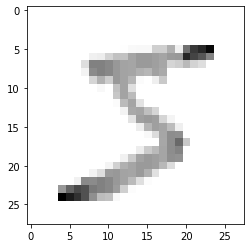

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary) #cmap color map  cm.binary = preto e branco
plt.show

In [ ]:
model.save('num_reader.model') #Salvar o treino 

INFO:tensorflow:Assets written to: num_reader.model/assets


In [ ]:
new_model = tf.keras.models.load_model('num_reader.model') #Carrgamento o modelo do que foi treinado para outra variavel 

In [ ]:
predictions = new_model.predict(x_test)

In [ ]:
print(predictions) #tira a previsao das imagens do teste informando o numero aproximado da imagem

[[8.0790913e-10 5.0530044e-08 2.6823778e-07 ... 9.9999762e-01
  1.2042003e-07 3.7313475e-07]
 [6.1630753e-12 7.3506894e-06 9.9999177e-01 ... 8.0352763e-10
  8.1559243e-08 2.8155811e-12]
 [1.2384542e-07 9.9970859e-01 1.7129832e-05 ... 1.2069999e-05
  2.5082243e-04 1.1422283e-07]
 ...
 [9.7654183e-11 2.5509920e-07 2.1836524e-11 ... 7.6074417e-07
  6.8622455e-07 2.0948787e-04]
 [1.5625388e-11 1.0142813e-09 5.9209207e-11 ... 6.0465344e-09
  2.3446560e-03 8.5691784e-12]
 [4.6110248e-08 2.5084235e-09 3.3884184e-09 ... 7.1772019e-11
  2.2985477e-08 1.1427850e-09]]


AttributeError: ignored

In [ ]:
import numpy as np

print(np.argmax(predictions[9999])) #arredonda valores do array 

6


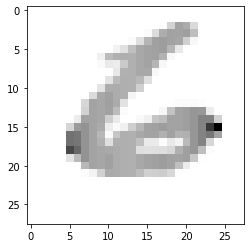

In [ ]:
plt.imshow(x_test[9999], cmap = plt.cm.binary)